In [1]:
#TEDDY LIONER 535180014
#import all libs needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math as m
import pandas as pd

from sklearn import linear_model

1. Baca Data 'Covid19.csv'

In [2]:
url = 'https://raw.githubusercontent.com/ClasherGeek77/ml-csv/main/Covid19.csv'
data = pd.read_csv(url)
data.head()

,Test,Positive
0,659338,23554
1,676527,20124
2,757350,22434
3,791044,21731
4,838747,24235


2. Gambar grafik scatter variabel 'Test' pada posisi x-axis dan variabel 'Positive' pada 'y-axis'!

Text(0, 0.5, 'Positive')

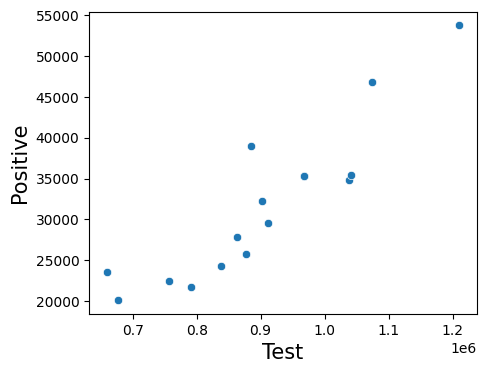

In [3]:
plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="Test", y="Positive", data=data, marker="o")
ax.set_xlabel('Test', fontsize=15)
ax.set_ylabel('Positive', fontsize=15, rotation=90)

3. Latih model regresi linier untuk menentukan "garis kecocokan terbaik" untuk data ini!

In [4]:
reg = linear_model.LinearRegression()
reg.fit(data["Test"].to_numpy().reshape(-1,1), data["Positive"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

4. Tampilkan nilai intercept coefficient (alpha) dan regression coefficien (beta) dari model regresi linear yang sudah dibuat!

In [5]:
print("Refression coefficient beta = %.3f" % (reg.coef_))
print("Intercept coefficient alpha = %.3f" % (reg.intercept_))

Refression coefficient beta = 0.058
Intercept coefficient alpha = -20379.228


5. Gambarlah plot model regresi linier bersama plot scatter di soal nomor 2!

In [6]:
#calculate model
min = np.min(data["Test"])
max = np.max(data["Test"])
model = reg.predict(np.arange(min, max).reshape(-1,1))

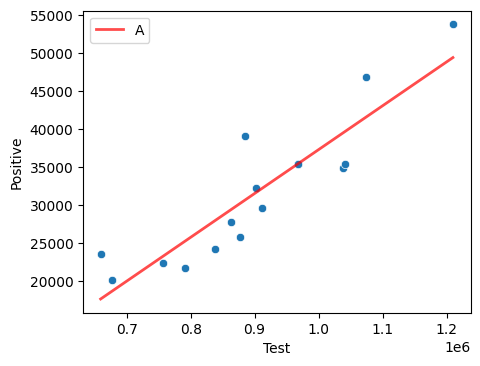

In [7]:
plt.subplots(figsize=(5,4), dpi=100)

ax.set_xlabel('Test', fontsize=15)
ax.set_ylabel('Positive', fontsize=15, rotation=90)
ax = sns.scatterplot(x="Test", y="Positive", data=data, markers='o')
ax = sns.lineplot(y=model.flatten(), x=np.arange(min,max),linestyle='-', color = 'r', label='A', alpha = 0.7, lw = 2)

6. Hitunglah goodness of fit R2!

In [8]:
from sklearn.metrics import r2_score
dataX = pd.DataFrame(data["Test"])
positive = reg.predict(dataX)
r2 = r2_score(data["Positive"], positive)
print("R2 (sklearn):", r2)

ssT = [((data["Positive"][i] - np.mean(data["Positive"])) ** 2) for i in range (0, len(data["Test"]))]
ssR = [((data["Positive"][i] - positive[i]) ** 2)               for i in range (0, len(data["Test"]))]
ssM = [((positive[i] - np.mean(data["Positive"])) ** 2)         for i in range (0, len(data["Test"]))]

print("R2 (method A):", np.sum(ssM)/np.sum(ssT))
print("R2 (method B):", 1 - np.sum(ssR)/np.sum(ssT))

R2 (sklearn): 0.8108087147597196
R2 (method A): 0.8108087147597193
R2 (method B): 0.8108087147597196


7. Hitunglah jumlah perkiraan kasus positive jika dilakukan test sebanyak 2000000!

In [9]:
print("Perkiraan kasus positif dengan jumlah 2000000 test adalah %d kasus." % reg.predict([[2000000]]))

Perkiraan kasus positif dengan jumlah 2000000 test adalah 94965 kasus.


8. Tambahkan data outlier Test = 1500000 dan Positive = 5000 pada dataset Covid19.cvs!

In [10]:
dataOut = data.append({'Test':1500000, 'Positive':5000}, ignore_index=True)
dataOut.tail()

,Test,Positive
12,1038954,34864
13,1041099,35460
14,1074493,46838
15,1210002,53762
16,1500000,5000


9. Gambarlah grafik scatter variabel 'Test' pada posisi x-axis dan variabel 'Positive' pada 'y-axis'!

Text(0, 0.5, 'Positive')

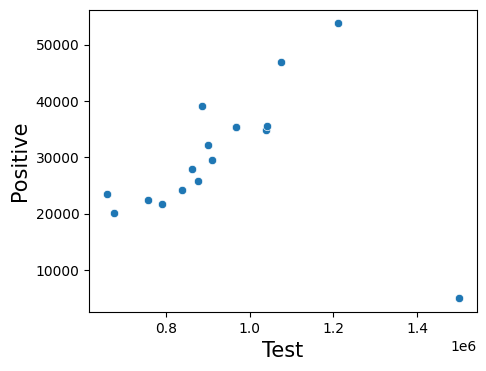

In [11]:
plt.subplots(figsize=(5,4), dpi=100)
aOut = sns.scatterplot(x="Test", y="Positive", data=dataOut, markers='o')
aOut.set_xlabel('Test', fontsize=15)
aOut.set_ylabel('Positive', fontsize=15, rotation=90)

10. Latih model regresi linier untuk menentukan "garis kecocokan terbaik" untuk data setelah ditambahkan outlier!

In [12]:
regOut = linear_model.LinearRegression()
regOut.fit(dataOut["Test"].to_numpy().reshape(-1,1), dataOut["Positive"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

11. Hitunglah goodness of fit R2 pada data setelah ditambah outlier!

In [13]:
dataOutX = pd.DataFrame(dataOut["Test"])
positiveOut = regOut.predict(dataOutX)
r2Out = r2_score(dataOut["Positive"], positiveOut)
print("R2 (sklearn):", r2Out)

ssTOut = [((dataOut["Positive"][i] - np.mean(dataOut["Positive"])) ** 2) for i in range (0, len(dataOut["Test"]))]
ssROut = [((dataOut["Positive"][i] - positiveOut[i]) ** 2)               for i in range (0, len(dataOut["Test"]))]
ssMOut = [((positiveOut[i] - np.mean(dataOut["Positive"])) ** 2)            for i in range (0, len(dataOut["Test"]))]

print("R2 (method A):", np.sum(ssMOut)/np.sum(ssTOut))
print("R2 (method B):", 1 - np.sum(ssROut)/np.sum(ssTOut))

R2 (sklearn): 0.009403446344090294
R2 (method A): 0.00940344634409025
R2 (method B): 0.009403446344090294


12. Tampilkan nilai R2 dari data asli (data sebelum ditambah outlier) dan data outlier (data setelah ditambah outlier)!

In [14]:
print("R2 w/o Outlier:", r2)
print("R2 w/ Outlier:", r2Out)

R2 w/o Outlier: 0.8108087147597196
R2 w/ Outlier: 0.009403446344090294


13. Apa kesimpulan anda tentang penggunaan model Regressi Linear pada data outlier?

Penggunaan model regresi linear dengan dataset yang mengandung outlier yang signifikan sangat tidak disarankan karena menghancurkan nilai akurasi dari 81% menjadi 9%.
Anjuran bagi penggunaan model regresi ini adalah menghilangkan data outlier sebelum digunakan untuk membentuk model regresi.